## RQ5:
Does being a tall player mean winning more air duels?
Make a plot that shows the dependency between height of the player and the ratio of air duels won with air duels attempted.The visualization should be a scatterplot, where each point (x,y) represent a player whose height is equal to x, and that has a ratio of winning air duels equal to y.
color any point according an arbitrary selection of categories of height

In [2]:
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
events = pd.read_json("./DS/events//events_England.json")


In [4]:
events.head(3)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609


In [5]:
#we need only air dual
events= events[events['subEventName'].isin(['Air duel'])]

In [6]:
events.head(3)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
12,1,Duel,21.878309,177959191,2499719,1H,8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631


In [7]:
events.columns

Index(['eventId', 'eventName', 'eventSec', 'id', 'matchId', 'matchPeriod',
       'playerId', 'positions', 'subEventId', 'subEventName', 'tags',
       'teamId'],
      dtype='object')

In [8]:
#Drop unnecessary columns
events=events.drop(columns=['eventSec','id','matchId','matchId','eventName',
                            'positions','matchPeriod','eventId','subEventId'])

In [9]:
events.head(3)

,playerId,subEventName,tags,teamId
7,8013,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,0,Air duel,"[{'id': 703}, {'id': 1801}]",1609
12,8653,Air duel,"[{'id': 703}, {'id': 1801}]",1631


In [10]:
player=pd.read_json('./DS/players.json')

In [11]:
player.head(2)

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228


In [12]:
player.columns

Index(['birthArea', 'birthDate', 'currentNationalTeamId', 'currentTeamId',
       'firstName', 'foot', 'height', 'lastName', 'middleName', 'passportArea',
       'role', 'shortName', 'weight', 'wyId'],
      dtype='object')

In [13]:
#Drop unnecessary columns
player=player.drop(columns=['birthArea', 'birthDate', 'currentNationalTeamId',
                          'foot', 'passportArea',
       'role', 'lastName','middleName','firstName'])

In [14]:
player.head(4)

,currentTeamId,height,shortName,weight,wyId
0,4502,187,H. Tekin,78,32777
1,3775,182,M. Sarr,73,393228
2,3772,176,O. Mandanda,72,393230
3,683,187,A. N'Diaye,82,32793


In [15]:
#merge playera table and events
#to get Information about each player who did the Air duel
player_event=pd.merge(player, events ,left_on='wyId', right_on='playerId')
player_event.head(5)

,currentTeamId,height,shortName,weight,wyId,playerId,subEventName,tags,teamId
0,1624,187,T. Alderweireld,91,36,36,Air duel,"[{'id': 701}, {'id': 1802}]",1624
1,1624,187,T. Alderweireld,91,36,36,Air duel,"[{'id': 701}, {'id': 1802}]",1624
2,1624,187,T. Alderweireld,91,36,36,Air duel,"[{'id': 703}, {'id': 1801}]",1624
3,1624,187,T. Alderweireld,91,36,36,Air duel,"[{'id': 703}, {'id': 1801}]",1624
4,1624,187,T. Alderweireld,91,36,36,Air duel,"[{'id': 703}, {'id': 1801}]",1624


In [16]:
player_event.columns

Index(['currentTeamId', 'height', 'shortName', 'weight', 'wyId', 'playerId',
       'subEventName', 'tags', 'teamId'],
      dtype='object')

In [17]:
#Drop unnecessary columns
player_event=player_event.drop(columns=['wyId','currentTeamId','weight'])

In [33]:
player_event.head(3)

,height,shortName,playerId,subEventName,tags,teamId
0,187,T. Alderweireld,36,Air duel,"[{'id': 701}, {'id': 1802}]",1624
1,187,T. Alderweireld,36,Air duel,"[{'id': 701}, {'id': 1802}]",1624
2,187,T. Alderweireld,36,Air duel,"[{'id': 703}, {'id': 1801}]",1624


In [34]:
teams=pd.read_json('./DS/teams.json')

In [35]:
teams.head(3)

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691


In [36]:
#Since RQs Performed only over the Premier League so teams ids matched the players
area=pd.DataFrame(list(teams['area']))

In [37]:
teams=pd.concat([area, teams], axis=1)

In [38]:
teams=teams.drop(columns=['officialName', 'area',
                          'alpha3code', 'alpha2code','city'])

In [39]:
teams.columns=['id','Country ','TeamName','type','wyId']
#only club teams 
teams = teams.drop(teams.index[teams.type == 'national'])


In [40]:
#PL
teams = teams[teams['Country '].isin(['England'])]

In [41]:
teams.head(3)

,id,Country,TeamName,type,wyId
0,0,England,Newcastle United,club,1613
8,0,England,Huddersfield Town,club,1673
26,0,England,AFC Bournemouth,club,1659


In [42]:
#get players team's ids who matches PL team ids
air_duals=pd.merge(teams, player_event, left_on='wyId', right_on='teamId')

In [43]:
air_duals.head(5)

,id,Country,TeamName,type,wyId,height,shortName,playerId,subEventName,tags,teamId
0,0,England,Newcastle United,club,1613,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1613
1,0,England,Newcastle United,club,1613,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1613
2,0,England,Newcastle United,club,1613,175,R. Aarons,337225,Air duel,"[{'id': 1901}, {'id': 701}, {'id': 1802}]",1613
3,0,England,Newcastle United,club,1613,175,R. Aarons,337225,Air duel,"[{'id': 703}, {'id': 1801}]",1613
4,0,England,Newcastle United,club,1613,175,R. Aarons,337225,Air duel,"[{'id': 703}, {'id': 1801}]",1613


In [44]:
air_duals=air_duals.drop(columns=['id', 'wyId', 'TeamName','type','teamId'
])
air_duals.head(3)

,Country,height,shortName,playerId,subEventName,tags
0,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]"
1,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]"
2,England,175,R. Aarons,337225,Air duel,"[{'id': 1901}, {'id': 701}, {'id': 1802}]"


In [45]:
#new tag to Understand the meaning of the tags by adding PassResult Column 
q = [] #temporal col name
for i in range(len(air_duals)): 
    q.append(air_duals.iloc[i, 5]) #At col pos 5
        
is_correct = [] 
for i in range(len(q)):
    for j in range(len(q[i])):
        d = q[i][j]
        if d['id'] == 1801 or d['id'] == 1802:
            is_correct.append(d['id'])

air_duals['PassResult'] = is_correct # Let's add the column to the DF

In [46]:
air_duals.head(3)

,Country,height,shortName,playerId,subEventName,tags,PassResult
0,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801
1,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801
2,England,175,R. Aarons,337225,Air duel,"[{'id': 1901}, {'id': 701}, {'id': 1802}]",1802


In [47]:
# literal description 
final_Result=[]
for i in range(len(air_duals)):
    if air_duals.PassResult.iloc[i] ==1801:
        final_Result.append("Won")
    if air_duals.PassResult.iloc[i] ==1802:
        final_Result.append("Lose")
air_duals["Final_Result"]=final_Result

In [48]:
air_duals.head(3)

,Country,height,shortName,playerId,subEventName,tags,PassResult,Final_Result
0,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801,Won
1,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801,Won
2,England,175,R. Aarons,337225,Air duel,"[{'id': 1901}, {'id': 701}, {'id': 1802}]",1802,Lose


In [49]:
#new table contains : the number of total passes for each player 
player_tot_result=air_duals[['playerId', 'Final_Result']]
#
player_tot_result.head(5)

,playerId,Final_Result
0,337225,Won
1,337225,Won
2,337225,Lose
3,337225,Won
4,337225,Won


In [50]:
#To count how many times each player attempted Air duels 
player_tot_result=player_tot_result.groupby("playerId").count()
player_tot_result.head(5)

,Final_Result
playerId,
36,55
38,19
48,213
54,52
56,8


In [51]:
player_tot_result.reset_index(level=0, inplace=True)

#the table contains player id and total air dules attempts
player_tot_result.columns=["playerId","TotalAirDuels"]
player_tot_result.head(5)

,playerId,TotalAirDuels
0,36,55
1,38,19
2,48,213
3,54,52
4,56,8


In [52]:
#players ids without Duplication, to know the actual number of palyers
all_player= air_duals['playerId'].unique()
all_player.shape

(468,)

In [53]:

#new dict where unique players ids and the result of their passes
pasess={} #new dic to store multi values for one palyer 
for i in all_player:
    pasess.update({i:[]}) #add all unique players
    
for x in pasess:
    for i in range(len(air_duals)):
        if x == air_duals.iloc[i,3]: #if the id of the player same as in main df
            pasess[x].append(air_duals.iloc[i,6])
#add what is the Final_Result main df to player's id 1801 or 1802





In [43]:
pasess
#dict contains each player as key and the result of all the attempts 

In [54]:
#Counting the Successful Attempts
won_pasess={}
for i in pasess:
    counter=0
    for k in pasess[i]:
        if k ==1801:
            counter=counter+1

        won_pasess.update({i:counter})
        

In [46]:
won_pasess
#dict contains each player id and number of won air duels

In [55]:
#Convert dict to New DF contain players id and only successful Attempta
allwins=pd.DataFrame(won_pasess, index=[0] )
allwins=allwins.T
allwins.head(4)

,0
337225,4
25604,2
104851,5
7974,12


In [56]:
allwins=allwins.reset_index()

In [57]:
allwins.columns=['playerId','WonAirDuels']
allwins.head(3)
# allwins.shape

,playerId,WonAirDuels
0,337225,4
1,25604,2
2,104851,5


In [58]:
# Merge two tables: 
#1-table of the won air duels >> allwins
#2- for all attempts of air duels >> player_tot_result

player_win_total=pd.merge(allwins, player_tot_result, on="playerId")

In [59]:
player_win_total.head(5)

,playerId,WonAirDuels,TotalAirDuels
0,337225,4,6
1,25604,2,5
2,104851,5,5
3,7974,12,13
4,8004,59,106


In [60]:
player_win_total.shape
#to check actual number of player

(468, 3)

In [61]:
#the ratio
player_win_total["Ratio"]= round (player_win_total['WonAirDuels']/player_win_total['TotalAirDuels'],2)

In [62]:
player_win_total.head(4)

,playerId,WonAirDuels,TotalAirDuels,Ratio
0,337225,4,6,0.67
1,25604,2,5,0.40
2,104851,5,5,1.00
3,7974,12,13,0.92


In [63]:
#add back the height of players
final_df=pd.merge(air_duals,player_win_total , on='playerId')

In [64]:
final_df.head(3)

,Country,height,shortName,playerId,subEventName,tags,PassResult,Final_Result,WonAirDuels,TotalAirDuels,Ratio
0,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801,Won,4,6,0.67
1,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801,Won,4,6,0.67
2,England,175,R. Aarons,337225,Air duel,"[{'id': 1901}, {'id': 701}, {'id': 1802}]",1802,Lose,4,6,0.67


In [65]:
#the threshold , to avoid the multi attempts of each player 
#The mean of TotalAirDuels<Total air duals / number of players>
threshold=round (final_df.TotalAirDuels.mean())
threshold

159

In [66]:
#maximum trial 
player_win_total.TotalAirDuels.max()

497

In [67]:
#To drop players who don’t satisfy the threshold
final_df=final_df.drop(final_df[final_df.TotalAirDuels>threshold].index)

In [68]:
#before dropping with repitition
final_df.shape

(19213, 11)

In [69]:
final_df.head(5)

,Country,height,shortName,playerId,subEventName,tags,PassResult,Final_Result,WonAirDuels,TotalAirDuels,Ratio
0,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801,Won,4,6,0.67
1,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801,Won,4,6,0.67
2,England,175,R. Aarons,337225,Air duel,"[{'id': 1901}, {'id': 701}, {'id': 1802}]",1802,Lose,4,6,0.67
3,England,175,R. Aarons,337225,Air duel,"[{'id': 703}, {'id': 1801}]",1801,Won,4,6,0.67
4,England,175,R. Aarons,337225,Air duel,"[{'id': 703}, {'id': 1801}]",1801,Won,4,6,0.67


In [70]:
#drop duplicated rows
final_df=final_df.drop_duplicates('playerId') 


In [71]:
final_df.head(5)

,Country,height,shortName,playerId,subEventName,tags,PassResult,Final_Result,WonAirDuels,TotalAirDuels,Ratio
0,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801,Won,4,6,0.67
6,England,175,H. Saivet,25604,Air duel,"[{'id': 701}, {'id': 1802}]",1802,Lose,2,5,0.40
11,England,191,M. D\u00fabravka,104851,Air duel,"[{'id': 703}, {'id': 1801}]",1801,Won,5,5,1.00
16,England,188,R. Elliot,7974,Air duel,"[{'id': 703}, {'id': 1801}]",1801,Won,12,13,0.92
29,England,188,C. Clark,8004,Air duel,"[{'id': 703}, {'id': 1801}]",1801,Won,59,106,0.56


In [72]:
#After the droping
#to check number of players and how many were eliminated 
final_df.shape

(412, 11)

In [73]:
#New table for plotting
scatter_plot=final_df[["playerId","height",'Ratio']]

In [74]:
scatter_plot.head(5)

,playerId,height,Ratio
0,337225,175,0.67
6,25604,175,0.40
11,104851,191,1.00
16,7974,188,0.92
29,8004,188,0.56


In [75]:
max_=scatter_plot.height.max()
min_=scatter_plot.height.min()

In [76]:
max_

201

In [77]:
min_

163

Text(0.5, 0, 'Height')

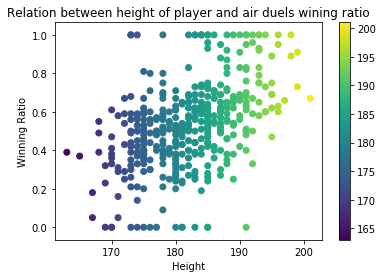

In [78]:
x=scatter_plot.height
y=scatter_plot.Ratio
color=scatter_plot.height
plt.scatter(x, y, c=color)
plt.colorbar()
plt.title("Relation between height of player and air duels wining ratio")
plt.ylabel("Winning Ratio")
plt.xlabel("Height")